# Powerlifting Data

Data source: https://www.kaggle.com/datasets/waqi786/powerlifting-data/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("data/powerlifting_dataset.csv")

In [3]:
df_raw.head()

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [5]:
df_raw.describe()

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [83]:
len(df_raw["Lifter Name"].unique())

10

#### Pointers
* There are no null values
* `Weight Class` could be numeric
* The data is for only 10 players

## Data cleaning

In [10]:
df = df_raw.copy()
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")
df.columns

Index(['lifter_name', 'age', 'weight_class', 'lift_type', 'amount_lifted_kg'], dtype='object')

In [11]:
df['weight_class'].unique()

array(['59 kg', '83 kg', '105 kg', '66 kg', '74 kg', '120 kg', '93 kg',
       '52 kg', 'Open'], dtype=object)

* So `weight_class` is infact categorical

In [13]:
df['lift_type'] = df['lift_type'].str.lower().str.replace(" ", "_")
df['weight_class'] = df['weight_class'].str.lower().str.replace(" ", "_")

## Data analysis

#### **1.** Distribution of age

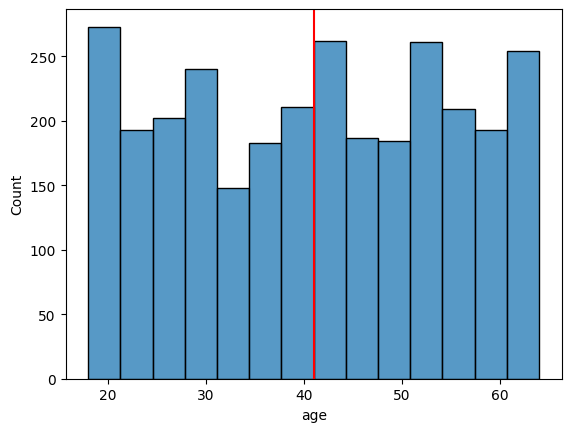

count    3000.000000
mean       41.064000
std        13.682628
min        18.000000
25%        29.000000
50%        41.000000
75%        53.000000
max        64.000000
Name: age, dtype: float64

In [40]:
sns.histplot(df['age'])
plt.axvline(df['age'].mean(), 0,300, color="red")
plt.show()
df['age'].describe()

#### **2.** Distribution of amount_lifted_kg

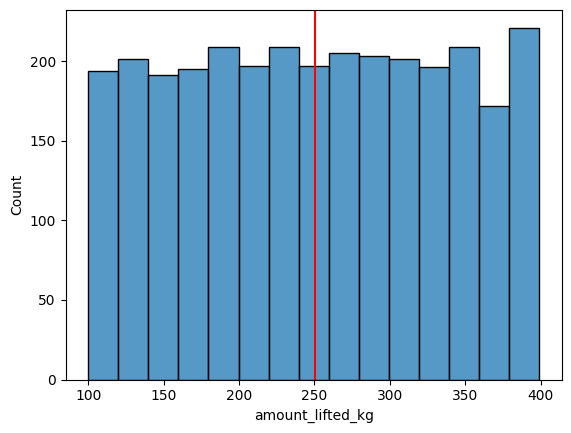

count    3000.000000
mean      250.332667
std        86.281208
min       100.000000
25%       176.750000
50%       250.000000
75%       325.250000
max       399.000000
Name: amount_lifted_kg, dtype: float64

In [41]:
sns.histplot(df['amount_lifted_kg'])
plt.axvline(df['amount_lifted_kg'].mean(), 0,300, color="red")
plt.show()
df['amount_lifted_kg'].describe()

#### **3.** Relation between age and amount_lifted_kg

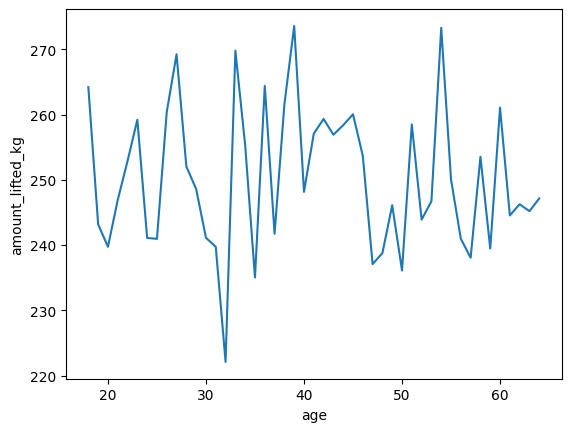

In [50]:
mean_by_age = df.groupby(by="age")['amount_lifted_kg'].mean().reset_index()
sns.lineplot(mean_by_age, x="age", y="amount_lifted_kg", )
plt.show()

In [ ]:
mean_by_age = df.groupby(by="age")['amount_lifted_kg'].mean().reset_index()
sns.lineplot(mean_by_age, x="age", y="amount_lifted_kg", )
plt.show()

#### **4.** What are the most common age in each weight_class

In [73]:
age_mode_in_wc = df[['weight_class', "age"]].groupby('weight_class')["age"].agg(lambda x: x.mode().iloc[0]).sort_index()
age_mode_in_wc

weight_class
105_kg    22
120_kg    24
52_kg     64
59_kg     27
66_kg     19
74_kg     52
83_kg     43
93_kg     64
open      45
Name: age, dtype: int64

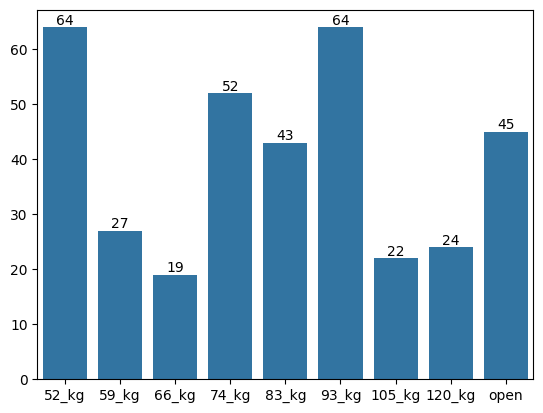

In [75]:
wcs = ['52_kg', '59_kg', '66_kg', '74_kg', '83_kg', '93_kg', '105_kg', '120_kg', 'open']
data = [ age_mode_in_wc[wc] for wc in wcs]
ax = sns.barplot(x=wcs, y=data)
for i in ax.containers:
    ax.bar_label(i, )
plt.show()

#### **5.** What player have most number of matches
`Emily Davis`

In [84]:
lifter_match_count = df.groupby("lifter_name")["lifter_name"].value_counts().sort_values(ascending=False)

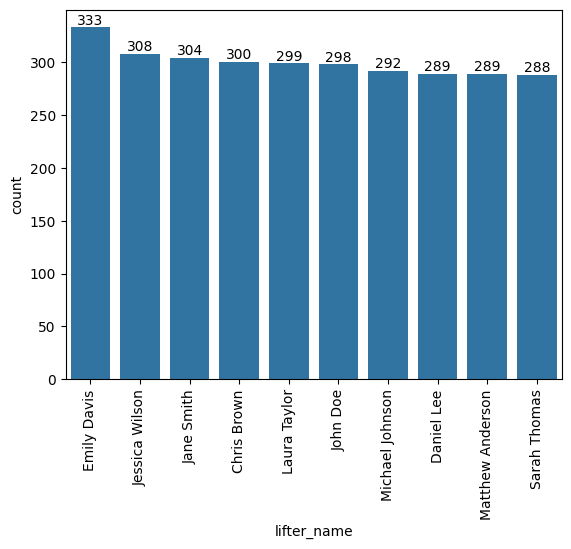

Player with most number of matches: Emily Davis


In [95]:
g = sns.barplot(lifter_match_count)
for i in g.containers:
    g.bar_label(i)
plt.xticks(rotation=90)
plt.show()
print(f"Player with most number of matches: {lifter_match_count.index[0]}")

#### **6.** What player have competed in most number of lift_type/weight_class

| Category | Player |
| -------- | ------ |
| **lift_type** | Emily Davis |
| **weight_class** | Laura Taylor |

In [120]:
df[["lift_type", "lifter_name"]].groupby("lifter_name").agg(lambda x: (x.value_counts().values[0], x.value_counts().index[0])).sort_values(by="lift_type", ascending=False)

,lift_type
lifter_name,
Emily Davis,"(115, squat)"
Laura Taylor,"(112, deadlift)"
Jessica Wilson,"(110, bench_press)"
John Doe,"(109, deadlift)"
Jane Smith,"(107, squat)"
Chris Brown,"(106, deadlift)"
Michael Johnson,"(104, deadlift)"
Daniel Lee,"(104, bench_press)"
Matthew Anderson,"(103, squat)"


In [121]:
df[["weight_class", "lifter_name"]].groupby("lifter_name").agg(lambda x: (x.value_counts().values[0], x.value_counts().index[0])).sort_values(by="weight_class", ascending=False)

,weight_class
lifter_name,
Laura Taylor,"(46, 93_kg)"
Emily Davis,"(46, 83_kg)"
Michael Johnson,"(45, open)"
Jane Smith,"(43, open)"
Sarah Thomas,"(43, open)"
Jessica Wilson,"(41, open)"
Matthew Anderson,"(41, 120_kg)"
Chris Brown,"(40, 93_kg)"
Daniel Lee,"(40, 83_kg)"


#### **6.** What player have not competed in all lift_type/weight_class

| Category | Player |
| -------- | ------ |
| **lift_type** | All players |
| **weight_class** | No player |

In [133]:
all_lift_types = df["lift_type"].unique().tolist()
all_lift_types
df[["lift_type", "lifter_name"]].groupby("lifter_name").filter(lambda x: len(x["lift_type"].unique()) != len(all_lift_types))["lifter_name"].unique()

array([], dtype=object)

In [137]:
all_lift_types = df["lift_type"].unique().tolist()
all_lift_types
df[["weight_class", "lifter_name"]].groupby("lifter_name").filter(lambda x: len(x["weight_class"].unique()) == len(all_lift_types))["lifter_name"].unique()

array([], dtype=object)

#### **7.** Oldest/Youngest age players have competed in
#### **8.** Yongest of heaviest weight lifter

| Category | Player |
| -------- | ------ |
| **Oldest age** | Chris Brown, age = 64 |
| **Youngest age** | Chris Brown, age = 18|
| **Yongest of heaviest weight lifter** | Daniel Lee, weight lifted = 399 kg|

In [148]:
df.sort_values(by="age", ascending=False).iloc[0][['lifter_name', "age"]]

lifter_name    Chris Brown
age                     64
Name: 651, dtype: object

In [149]:
df.sort_values(by="age").iloc[0][['lifter_name', "age"]]

lifter_name    Chris Brown
age                     18
Name: 1006, dtype: object

In [150]:
df.sort_values(by=["amount_lifted_kg", "age"], ascending=[False, True]).iloc[0][["lifter_name", "amount_lifted_kg"]]

lifter_name         Daniel Lee
amount_lifted_kg           399
Name: 1409, dtype: object